#  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2021-1**<br>
**Profesora:** Paula Aguirre <br>

----

<h1><center> <span style="color: blue;">Tarea 1 - Alumno: Larry Uribe</span></center></h1>

 <h1><center>Tarea 1: Herramientas Computacionales para Ciencia de Datos </center></h1>
    
## Instrucciones Generales.

- Fecha de entrega: 30 de agosto de 2021, 23:59.

- Vía de entrega: GitHub

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.

- La Tarea debe ser desarrollada en lenguaje de programación Python y en formato Jupyter Notebook.

- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.

- Se sugiere hacer consultas y comentarios sobre la Tarea a traves del Foro del curso en Canvas.


## 1. Objetivos de Aprendizaje

Esta Tarea tiene como objetivo lograr un manejo inicial de librerías de Python fundamentales para el desarrollo de ciencia de datos, como `numpy`,`matplotlib`,`pandas`y `geopandas`. En los ejercicios a continuación, ud. deberá usar estas librerías para leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder algunas preguntas relativas a la evolución de contagios y vacunación COVID19 a nivel de comunas de Chile.




## 2. Datos de la Tarea.

Para esta Tarea, se utilizarán los siguientes conjuntos de datos:

### 2.1 Datos-COVID19 (https://github.com/MinCiencia/Datos-COVID19)

El objetivo de la Mesa de Datos COVID-19 liderada por el Ministerio de Ciencia, Tecnología, Conocimiento e Innovación es disponer de información de nuestro país durante la pandemia para promover el uso de datos para investigación científica, clínica y para soluciones innovadoras que contribuyan a la toma de decisiones de las autoridades y la ciudadanía frente a esta pandemia. Se disponen los datos epidemiológicos provenientes del Ministerio de Salud (MINSAL) y datos de otras fuentes, documentados y abiertos para el análisis de la comunidad, en concordancia con la Ley Nº 19.628.

Ver https://minciencia.gob.cl/covid19/ para más información, incluyendo actas de las reuniones de la mesa y también los informes publicados a la fecha.

El repositorio Datos-Covid19 contiene actualmente 91 productos de datos de acceso público. Para esta tarea, **ud. debe descargar directamente del repositorio** los siguientes conjuntos de datos:

**Data Product 1** - Casos totales por comuna incremental: Archivo con valores separados por coma (csv) que concatena historia de publicaciones de MINSAL sobre casos confirmados totales por comuna. Contiene las columnas 'Región', ‘Código Región’, 'Comuna', ‘Código comuna’, 'Población', múltiples columnas correspondientes a '[fecha]', y una columna 'Tasa'. Incluye versión con serie de tiempo. El archivo a utilizar es:


`Datos-COVID19/output/producto1/Covid-19.csv`


**Data Product 80** - Avance comunal en Campaña de Vacunación COVID-19: Este producto da cuenta del avance en la campaña de vacunación contra Sars-Cov-2 a nivel comunal. Dentro de este repositorio, el archivo a utilizar es: 

`Datos-COVID19/output/producto80/vacunacion_comuna_2daDosis.csv`

### 2.2 Cartografía nacional.

El archivo `comunasChile.gpkg`contiene una capa vectorial con la divisón comunal de Chile. Este archivo está incluido en el repositorio inicial de la tarea.


## 3. Desarrollo.

Para cada una de las siguientes preguntas, incluya una (o más) celdas de código con su desarrollo, y celdas de markdown con las respuesta o comentarios que sean necesarios, cuidando que sus soluciones sean completas pero breves, claras y concisas. Puede incluir sus respuestas entre preguntas a continuación.

Para los gráficos y figuras, debe asegurarse de incluir: título, títulos y etiquetas para cada eje, y leyenda.

### 3.1 Descargue los datos indicados en el punto 2.1 y agréguelos a su repositorio. Lea los datos desde su repositorio.


In [1]:
#Importando librerías a utilizar:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests, zipfile, io

#Descargando datos
#Descargando Data Product 1 desde RAW Content

url ='https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv'

r = requests.get(url, stream=True)
#print(r.url)

#guarda en el disco archivo Covid-19.csv en la ruta relativa actual
open('Covid-19.csv','wb').write(r.content)

#Leer archivo local previamente guardado en un DataFrame con delimitador ","
dat1=pd.read_csv('Covid-19.csv',delimiter=',')

#TEST: Visualizar las primeras lineas
#dat1.head()



**R3.1a Explicación en Markdown**

*Larry Uribe dice:*

<span style="color: blue;">1. Se importan las librerías requeridas<br>2. Se procede a descargar el archivo *Covid-19.csv* desde el repositorio en formato Raw para proceder a guardarlo en la carpeta local de trabajo con el mismo nombre *Covid-19.csv*<br>3. Se crea el Panda dataframe *dat1* desde la lectura del archivo CSV local.
</span>
 


In [2]:
#Descargando Data Product 80
url ='https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_2daDosis.csv'

r = requests.get(url, stream=True)
#print(r.url)

#guarda en el disco archivo Covid-19.csv en la ruta relativa actual
open('vacunacion_comuna_2daDosis.csv','wb').write(r.content)

#Leer archivo local previamente guardado en un DataFrame con delimitador ","
dat80=pd.read_csv('vacunacion_comuna_2daDosis.csv',delimiter=',')

#TEST: Visualizar las primeras lineas
#dat80.head()


**R3.1b Explicación en Markdown**

*Larry Uribe dice:* 

<span style="color: blue;">1. Se importan las librerías requeridas<br>2. Se procede a descargar el archivo *vacunacion_comuna_2daDosis.csv* desde el repositorio en formato Raw para proceder a guardarlo en la carpeta local de trabajo con el mismo nombre *vacunacion_comuna_2daDosis.csv*<br>3. Se crea el Panda dataframe *dat80* desde la lectura del archivo CSV local.
</span>
 


### 3.2 ¿Cuántas comunas tiene Chile? (responda en base a una inspección de los datos entregados, no de su conocimiento del país)

In [3]:
#Total comunas del pais de cada Data product
#Data producto 1

total_comunas = dat1['Comuna'].count()
print('Total comunas:',total_comunas)

#Data producto 80

total_comunas = dat80['Comuna'].count()
print('Total comunas:',total_comunas)

#Coinciden un total de 362 comunas en cada conjunto de datos importados

Total comunas: 362
Total comunas: 362


**R3.2 Explicación en Markdown**

*Larry Uribe dice:*

<span style="color: blue;">
Se analizan los datos de ambos data product previamente generados y <b>se concluye que para ambos conjuntos de datos existe un total de 362 comunas</b> </span>
    


### 3.3 El último reporte publicado por el MINSAL a la fecha de publicación de esta Tarea, corresponde al 16/08/2021. Para esta fecha, determine:
**a)** La población total estimada para todo el país.<br>
**b)** El número total de casos confirmados en el último reporte. <br>
**c)** La variación de casos confirmados a nivel nacional, respecto a la semana anterior.<br>
**d)** Las comunas que reportaron el mayor y menor número de casos confirmados.<br>
**e)** La tasa nacional de casos confirmados (casos confirmados por cada 100 mil habitantes de una población).<br>
**f)** ¿En qué fecha se reportó el máximo número de casos confirmados a nivel nacional?<br>


In [4]:
#Total de población
total_poblacion=dat80['Poblacion'].sum()
print('A) Población total estimada al 16-08-2021:',total_poblacion)

#Total numero de casos confirmados al ultimo reporte
#primero limpia los datos no fecha

tmp = dat1.transpose()

tmp = tmp[6:len(tmp)-1] #elimina los encabezados comunas y ultima que es tasa

#ahora tmp contiene solo datos acumulados por fechas
#transpone de nuevo
tmp = tmp.transpose()
tmp2 = tmp

#ahora tmp debe considerar solo datos al 16-08-2021 segun enunciado

total_final = tmp['2021-08-16'].sum()

print("B) Total de casos confirmados al 16-08-2021: ",total_final)

#consideremos la resta entre dos reportes
total_variacion = (tmp['2021-08-16'].sum()-tmp['2021-08-09'].sum())
print("C) variación de casos confirmados a nivel nacional al 16-08-2016, respecto a la semana anterior (09-08-2021): ",total_variacion)

#comuna con mayor y menor cantidad de casos acumulados al 16-08-2021
aux=dat1[['Comuna','2021-08-16']]
aux

comuna_max = aux.iloc[aux['2021-08-16'].idxmax()]
comuna_min = aux.iloc[aux['2021-08-16'].idxmin()]


print("D) Mayor cantidad de casos en:", comuna_max[0], "con una cantidad acumulada de ",comuna_max[1],"casos al 16-08-2021")
print("D) Menor cantidad de casos en:", comuna_min[0], "con una cantidad acumulada de ",comuna_min[1],"casos al 16-08-2021")

#calcula la tasa
tasa = (total_final/total_poblacion)*100000

print("E) La tasa nacional de casos confirmados (por cada 100.000 habitantes) es:",tasa)

#calcula totales por día
tmp = tmp.sum()
#calcula diferencia entre cada fecha de reporte
tmp = tmp.diff()

tmp2 = pd.DataFrame(tmp)
tmp2.reset_index(level=0, inplace=True)

tmp2.set_axis(['fecha','casos'], axis=1,inplace=True)


#ahora busca el maximo de casos correspondiente:

dia_max = tmp2.iloc[tmp2['casos'].idxmax()]

print("F) dia con mayor casos detectados:",dia_max[0],"con",dia_max[1],"casos")

A) Población total estimada al 16-08-2021: 19458310.0
B) Total de casos confirmados al 16-08-2021:  1957485.0
C) variación de casos confirmados a nivel nacional al 16-08-2016, respecto a la semana anterior (09-08-2021):  7319.0
D) Mayor cantidad de casos en: Puente Alto con una cantidad acumulada de  73472.0 casos al 16-08-2021
D) Menor cantidad de casos en: Juan Fernandez con una cantidad acumulada de  1.0 casos al 16-08-2021
E) La tasa nacional de casos confirmados (por cada 100.000 habitantes) es: 10059.892148907074
F) dia con mayor casos detectados: 2020-06-19 con 71384.0 casos


**3.3 Respuestas en Markdown:**
    
**a)** La población total estimada para todo el país.<br> 
<span style="color: blue;">
Para el conjunto de datos analizado, <b>se concluye que la población estimada es 19.458.310.-<br></b> </span>

**b)** El número total de casos confirmados en el último reporte. <br>
<span style="color: blue;">
Para el conjunto de datos analizado, <b>se concluye que el total de casos confirmados es de  1.957.485.-<br></b> </span>

**c)** La variación de casos confirmados a nivel nacional, respecto a la semana anterior.<br>
<span style="color: blue;">
Para el conjunto de datos analizado, <b>se concluye que la variación de casos confirmados a nivel nacional al 16-08-2021, respecto a la semana anterior (09-08-2021) es de 7.319.-<br></b> </span>

**d)** Las comunas que reportaron el mayor y menor número de casos confirmados.<br>
<span style="color: blue;">
Para el conjunto de datos analizado, <b>se concluye que la mayor cantidad de casos fue en Puente Alto con una cantidad acumulada de 73.472.- y la menor cantidad de casos fue en Juan Fernandez con una cantidad acumulada de  1.0 casos al 16-08-2021<br></b> </span>

**e)** La tasa nacional de casos confirmados (casos confirmados por cada 100 mil habitantes de una población).<br>
<span style="color: blue;">
Para el conjunto de datos analizado, <b>se concluye que la tasa nacional de casos confirmados (por cada 100.000 habitantes) fue de 10.059,892148907074 <br></b> </span>

**f)** ¿En qué fecha se reportó el máximo número de casos confirmados a nivel nacional?<br>
<span style="color: blue;">
Para el conjunto de datos analizado, <b>se concluye que dia con mayor casos detectados fue el 19-06-2019 con 71.384.- casos <br></b> </span>


### 3.4  Elija una comuna cualquiera de Chile (indique cuál) y genere un (único) gráfico con la evolución en el tiempo del los casos  confirmados incremental y del *total* de población vacunada con dos dosis en dichas comunas, desde el 1 de febrero al 16 de agosto de 2021. 
Guarde el gráfico en formato .jpg.

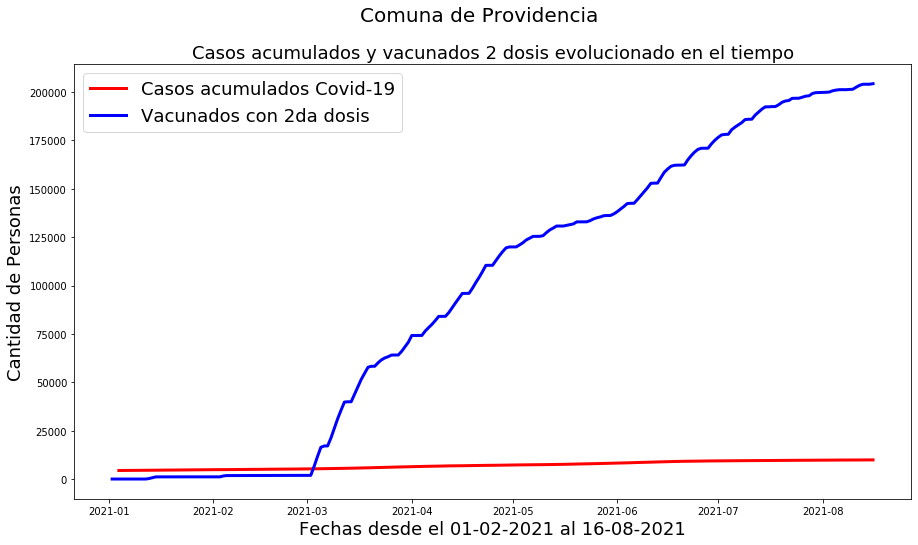

In [5]:
#comuna de providencia
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
from datetime import datetime, timedelta

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #se agrega esto para ocultar un FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method 

comuna_parametro = 'Providencia'
fecha_inicio_parametro = '01-02-2021'
fecha_termino_parametro = '16-08-2021'

provi1 = dat1[dat1['Comuna'] == comuna_parametro]

provi1 = provi1.transpose()
provi1 = provi1[5:len(provi1)-1]
provi1.reset_index(level=0, inplace=True)
provi1.set_axis(['fecha','casos'], axis=1,inplace=True)
provi1['fecha']= pd.to_datetime(provi1['fecha'])

provi1 = provi1[provi1['fecha'] >= fecha_inicio_parametro]
provi1 = provi1[provi1['fecha'] <= fecha_termino_parametro ]

#provi.plot()

provi2 = dat80[dat80['Comuna'] == comuna_parametro]
provi2 = provi2.transpose()
provi2 = provi2[5:]
provi2 =provi2.cumsum() #calcula la suma acumulada de vacunados por cada fecha
provi2.reset_index(level=0, inplace=True)
provi2.set_axis(['fecha','dosis'], axis=1,inplace=True)


provi2['fecha']= pd.to_datetime(provi2['fecha'])

provi2 = provi2[provi2['fecha'] >= fecha_inicio_parametro]
provi2 = provi2[provi2['fecha'] <= fecha_termino_parametro]

fig = plt.figure(figsize=(15, 8))

plt.plot(provi1['fecha'],provi1['casos'] , linewidth=3, c='red', label=r'Casos acumulados Covid-19')
plt.plot(provi2['fecha'],provi2['dosis'] , linewidth=3, c='blue', label=r'Vacunados con 2da dosis')

plt.legend(fontsize=18)
plt.title('Casos acumulados y vacunados 2 dosis evolucionado en el tiempo', fontsize=18)
plt.suptitle('Comuna de '+ comuna_parametro, fontsize=20)
plt.xlabel('Fechas desde el '+fecha_inicio_parametro+' al '+fecha_termino_parametro, fontsize=18)
plt.ylabel('Cantidad de Personas', fontsize=18)


plt.show()

fig.savefig('CasosVacunasenProvidencia.jpg')

**3.4 Respuestas en Markdown:**
    
**Comuna seleccionada: **  <span style="color: blue;">
<b>Providencia<br> <br></b> </span>



<span style="color: blue;">
<b>Se agrega el gráfico, en el código se dejó variable @comuna_parametro, @fecha_inicio_parametro y @fecha_termino_parametro<br></b> para conveniencia de cambiar el calculo y grafico con otra comuna y rango fechas </span>


<span style="color: blue;">
<br><br><b>Gráfico contiene título, ejes, nombre de ejes, y dos líneas que representan los datos de su leyenda, casos acumulados de la comuna y personas vacunadas acumuladas (tuvo que ser necesario sumar los valores, ya que no venían acumulados en el data product 80 original.<br></b> Archivo guardado en repositorio con nombre de: CasosVacunasenProvidencia.jpg</span>

### 3.5 Genere un mapa de Chile con el total de casos confirmados por comuna para el día 16/08/2021, y guárdelo en formato .jpg.
Guarde el gráfico en formato .jpg.

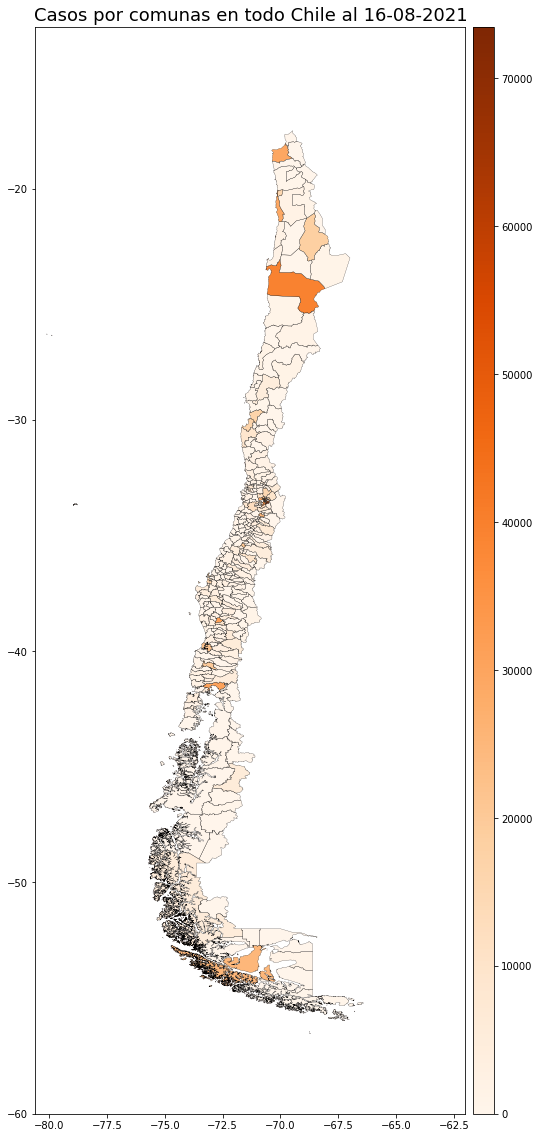

In [6]:
#desactiva warning en pantalla
pd.set_option('mode.chained_assignment', None)

#Crear figura y ejes
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

#Leer mapa de chile
chile=gpd.read_file('comunasChile.gpkg')

#estandariza a mayuscula los datos de comunas de data product1 para hacer correctamente el LEFT OUTTER JOIN de MERGE

aux['Comuna'] = aux['Comuna'].str.upper()

#renombra columna 2021-08-16 por casos
aux.rename(columns={'2021-08-16': 'casos'}, inplace=True)

#crea geodataframe uniendo por comunas los casos
chile_region = chile.merge(aux, how='left', left_on="NOM_COMUNA", right_on="Comuna") #left outter join resuelve que el mapa quede completo

#cambia na por 0

chile_region['casos']=chile_region['casos'] .fillna(0)


Z=chile_region['casos']

#dibuja en pantalla
chile_region.plot(ax=ax,column='casos',cmap='Oranges',legend=True, vmin=0,vmax=73500,cax=cax) #maxima escala de color 73500 puente alto
chile_region.boundary.plot(ax=ax,lw=0.2,color='k')



#agrega titulo
ax.set_title('Casos por comunas en todo Chile al 16-08-2021',fontsize=18)


#coordenadas del cuadrante chile en latitud longitud
xlim=[-80.6, -62]
ylim=[-60, -13]

#Para comprobar comunas en santiago se puede utilizar estos otros limites
#xlim=[-70.9,-70.4]
#ylim=[-33.7,-33.2]

#for x, y, label,casos in zip(chile_region.geometry.centroid.x, chile_region.geometry.centroid.y, chile_region.NOM_COMUNA, chile_region.casos ):
#    if xlim[0]<x<xlim[1] and ylim[0]<y<ylim[1] and casos >= 40000 :  #sobre 40.000 casos muestra el nombre
#        ax.text(x, y, label, fontsize = 10)


ax.set_xlim(xlim)
ax.set_ylim(ylim);

#muestra el grafico
plt.show()

#guarda archivo en disco
fig.savefig('ChileComunas.jpg')
#aux.to_csv("casosal1608.csv")


**3.5 Observaciones en Markdown:**
    
**Gráfico Mapa de Chile con comunas: **


<span style="color: blue;">
<b>Se agrega el gráfico, se tuvo que relacionar con operador merge en formato de left outter join y luego eliminar los valores NA por 0, de esta forma el país aparece completo y cuyas comunas no informadas en el dataset quedaron con valor cero<br><br>Las comunas con más casos se concentraron en la region metropolitana, destacando Puente Alto, Maipú y Santiago Centro.</b></span>


<span style="color: blue;">
<br><br><b>Gráfico contiene título, todas las comunas y fue centrado en la longitud y latitud de chile con un margen, se agregó la escala de colores con el valor 0 hasta el valor maximo reportado de Puente Alto cercano a 73.500.- casos <br></b> Archivo guardado en repositorio con nombre de: ChileComunas.jpg</span>

### 3.6 Finalmente, entregue su Tarea a través de su repositorio privado, incluyendo los datos descargados, gráficos y cualquier otro archivo que haya generado en el proceso.

**3.6 Respuestas en Markdown:**
    
<span style="color: blue;">
<b>Tarea 1 fue subida con éxito en versión 2.5 a github.com/imt2200 dentro del repositorio privado de usuario larryuc<br> <br></b> </span>

